In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import mpldatacursor
import plotly.express as px
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import itertools as it
from folium.plugins import HeatMap, HeatMapWithTime, MarkerCluster
import folium


sns.set_theme(style="white", palette=None)
sns.set_style("darkgrid")

%matplotlib inline
plt.style.use('seaborn-darkgrid')

### San Francisco Housing Price

In [2]:
# read csv, specify column indices (State, Metro, CountyName, RegionName)
df = pd.read_csv('Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv', index_col=[5,7,8,2])

In [3]:
# select only the city of San Francisco
df = df[df['City'] == 'San Francisco']

In [4]:
# format dates to mm/dd/yyyy
for i in range(4, len(df.columns)) :
    if len(df.columns[i]) == 9 :
        df.rename(columns = {df.columns[i]:'0'+df.columns[i]}, inplace = True)

In [5]:
df.head()

RegionID  \
State Metro                              CountyName           RegionName                  
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset       268384   
                                                              Mission            274552   
                                                              Outer Richmond     268383   
                                                              South of Market    268491   
                                                              Inner Richmond     268219   

                                                                               SizeRank  \
State Metro                              CountyName           RegionName                  
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset          183   
                                                              Mission               282   
                                                              Outer Richmond        415   
                                                              South of Market       426   
                                                              Inner Richmond        507   

                                                                                 RegionType  \
State Metro                              CountyName           RegionName                      
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset     neighborhood   
                                                              Mission          neighborhood   
                                                              Outer Richmond   neighborhood   
                                                              South of Market  neighborhood   
                                                              Inner Richmond   neighborhood   

                                                                              StateName  \
State Metro                              CountyName           RegionName                  
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset           CA   
                                                              Mission                CA   
                                                              Outer Richmond         CA   
                                                              South of Market        CA   
                                                              Inner Richmond         CA   

                                                                                        City  \
State Metro                              CountyName           RegionName                       
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset     San Francisco   
                                                              Mission          San Francisco   
                                                              Outer Richmond   San Francisco   
                                                              South of Market  San Francisco   
                                                              Inner Richmond   San Francisco   

                                                                               01/31/2000  \
State Metro                              CountyName           RegionName                    
CA    San Francisco-Oakland-Berkeley, CA San Francisco County Outer Sunset       412662.0   
                                                              Mission            407821.0   
                                                              Outer Richmond     555102.0   
                                                              South of Market    433491.0   
                                                              Inner Richmond     620881.0   

                                                                               02/29/2000  \
State Metro                              CountyName           RegionName         

In [6]:
# transpose indices and columns
df1 = df.T
dates = pd.to_datetime(df1.index, errors='coerce').dropna()
df1 = df1.loc[dates.strftime("%m/%d/%Y")]
df1.index = pd.to_datetime(df1.index, errors='coerce').dropna()   
df1 = df1['CA']['San Francisco-Oakland-Berkeley, CA']['San Francisco County']

In [7]:
df1.head()

RegionName,Outer Sunset,Mission,Outer Richmond,South of Market,Inner Richmond,Parkside,Pacific Heights,Tenderloin,Excelsior,Noe Valley,...,Fisherman's Wharf,Seacliff,Mount Davidson Manor,St. Francis Wood,Dogpatch,Balboa Terrace,Presidio,Monterey Heights,Showplace Square,Westwood Highlands
2000-01-31,412662.0,407821.0,555102.0,433491.0,620881.0,428407.0,819086.0,279118.0,338247.0,678379.0,...,NaN,1338786.0,576896.0,1175033.0,420031.0,799049.0,NaN,950721.0,NaN,628808.0
2000-02-29,415417.0,408753.0,557232.0,436951.0,626163.0,431550.0,825377.0,285784.0,340999.0,683815.0,...,NaN,1347721.0,580362.0,1178979.0,421406.0,801400.0,NaN,957538.0,NaN,637332.0
2000-03-31,418625.0,415210.0,560547.0,442403.0,630937.0,434482.0,834732.0,288315.0,343940.0,691848.0,...,NaN,1363061.0,584510.0,1189019.0,423097.0,807248.0,NaN,962924.0,NaN,641618.0
2000-04-30,425864.0,428061.0,568579.0,452272.0,641038.0,440533.0,852400.0,296507.0,349145.0,706462.0,...,NaN,1380956.0,594163.0,1209488.0,427437.0,820598.0,NaN,977529.0,NaN,653721.0
2000-05-31,433338.0,443709.0,576660.0,462180.0,651836.0,446290.0,872435.0,300013.0,355121.0,728218.0,...,NaN,1392880.0,607794.0,1233317.0,434815.0,836535.0,NaN,995026.0,NaN,660185.0


In [8]:
# define date/time column for ease of access
df1['year'] = pd.DatetimeIndex(df1.index).year
df1['year'] = df1['year'].values.astype('str')

# group dates by year (average of months)
df1 = df1.groupby('year').mean()

In [9]:
df1.head()

RegionName,Outer Sunset,Mission,Outer Richmond,South of Market,Inner Richmond,Parkside,Pacific Heights,Tenderloin,Excelsior,Noe Valley,...,Fisherman's Wharf,Seacliff,Mount Davidson Manor,St. Francis Wood,Dogpatch,Balboa Terrace,Presidio,Monterey Heights,Showplace Square,Westwood Highlands
year,,,,,,,,,,,,,,,,,,,,,
2000,448690.166667,463017.000000,595151.166667,480327.166667,672143.666667,460200.833333,9.034182e+05,316416.833333,366355.833333,7.616357e+05,...,NaN,1.423950e+06,629532.250000,1.255863e+06,462332.666667,8.548992e+05,NaN,1.021411e+06,NaN,673549.500000
2001,532980.416667,552066.250000,690260.250000,562010.083333,771800.500000,548141.500000,1.064780e+06,388059.166667,435063.250000,8.659458e+05,...,NaN,1.694386e+06,741795.750000,1.404818e+06,563506.500000,9.737941e+05,NaN,1.178495e+06,NaN,748357.416667
2002,553162.583333,543501.250000,707113.500000,512309.416667,792790.916667,575508.083333,1.040218e+06,373731.416667,465050.500000,8.317309e+05,...,NaN,1.768974e+06,740765.583333,1.493808e+06,482780.000000,9.913220e+05,NaN,1.212756e+06,NaN,737152.000000
2003,601400.416667,578652.500000,768004.333333,534530.083333,842302.666667,624595.750000,1.075276e+06,380037.583333,516623.416667,8.880173e+05,...,NaN,1.780036e+06,771805.416667,1.486105e+06,483304.416667,1.027082e+06,NaN,1.263118e+06,NaN,780897.583333
2004,691603.333333,640833.833333,868590.333333,593468.750000,935414.916667,711137.000000,1.168361e+06,421655.416667,600039.916667,1.004245e+06,...,929614.75,1.966180e+06,872389.000000,1.650695e+06,572353.666667,1.119395e+06,NaN,1.430995e+06,NaN,863115.500000


In [10]:
# fill the missing values with mean value of that year
final_home_pricing = df1.fillna(df1.mean())

In [11]:
# transpose years into columns
final_home_pricing = final_home_pricing.T

In [12]:
final_home_pricing.head()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
RegionName,,,,,,,,,,,,,,,,,,,,,
Outer Sunset,448690.166667,532980.416667,553162.583333,601400.416667,691603.333333,8.024484e+05,8.212499e+05,8.331868e+05,7.941639e+05,7.223779e+05,...,8.108189e+05,9.059170e+05,1.027256e+06,1.141426e+06,1.192336e+06,1.343274e+06,1.371258e+06,1.407980e+06,1.543000e+06,1.649621e+06
Mission,463017.000000,552066.250000,543501.250000,578652.500000,640833.833333,7.773008e+05,8.242298e+05,8.414890e+05,8.188643e+05,7.344437e+05,...,9.169150e+05,1.068127e+06,1.187896e+06,1.245153e+06,1.279082e+06,1.387070e+06,1.406370e+06,1.386725e+06,1.352265e+06,1.383288e+06
Outer Richmond,595151.166667,690260.250000,707113.500000,768004.333333,868590.333333,9.857578e+05,9.977957e+05,1.011428e+06,9.751241e+05,8.752376e+05,...,9.686918e+05,1.137758e+06,1.275285e+06,1.393525e+06,1.444469e+06,1.588298e+06,1.611372e+06,1.637939e+06,1.699773e+06,1.817137e+06
South of Market,480327.166667,562010.083333,512309.416667,534530.083333,593468.750000,7.130676e+05,7.512482e+05,7.638737e+05,7.362011e+05,6.520960e+05,...,7.713561e+05,8.715964e+05,9.671308e+05,1.006513e+06,9.750322e+05,1.018050e+06,1.023071e+06,1.021945e+06,9.688817e+05,9.669738e+05
Inner Richmond,672143.666667,771800.500000,792790.916667,842302.666667,935414.916667,1.122992e+06,1.144390e+06,1.170547e+06,1.159855e+06,1.066749e+06,...,1.201221e+06,1.421820e+06,1.599425e+06,1.724969e+06,1.769082e+06,1.952030e+06,1.994369e+06,1.959225e+06,2.008570e+06,2.187840e+06


In [13]:
# remove longitude and latitude for every region in datasets
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(city):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(city)
      
    except GeocoderTimedOut:
          
        return findGeocode(city)    
  
# each value from the city column
# will be fetched and sent to
# function find_geocode   
for i in (final_home_pricing.index):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate lists
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(0)
        longitude.append(0)

In [14]:
# store the values in the dataset 
final_home_pricing['Lng'] = longitude
final_home_pricing['Lat'] = latitude
final_home_pricing['region'] = final_home_pricing.index

In [15]:
def plot_year(year):
    year_data = final_home_pricing[str(year)]
    plt.scatter(final_home_pricing["Lng"], final_home_pricing["Lat"], c=year_data,  s=year_data**(0.35))
    plt.colorbar()
    plt.title(f'Year: {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

interact(plot_year, year=(2000, 2022))

interactive(children=(IntSlider(value=2011, description='year', max=2022, min=2000), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

In [16]:
def plot_year(year):
    df = final_home_pricing.copy()
    df["year"] = year
    df = df.melt(id_vars = ["region", "Lng","Lat"], value_vars = [str(year)], var_name = "year", value_name = "value" )
    fig = px.scatter(df, x='Lng', y='Lat', size='value', color='value', hover_name='region', title=f"Year: {year}")
    fig.update_layout(width=800, height=600)
    fig.show()

interact(plot_year, year=(2000, 2022))

interactive(children=(IntSlider(value=2011, description='year', max=2022, min=2000), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

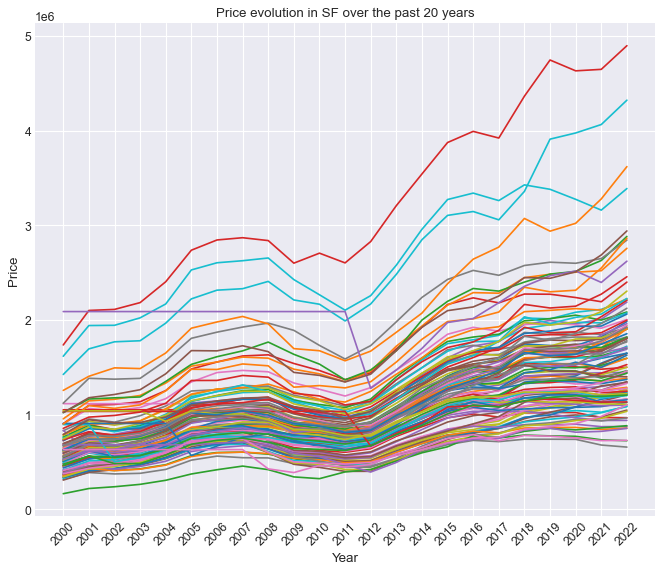

In [17]:
# prepare the data for the lineplot
final_home_pricing_lineplot = final_home_pricing.drop(['Lng','Lat','region'], axis=1).T

final_home_pricing_lineplot = final_home_pricing_lineplot.reset_index()

figure(figsize=(10, 8), dpi=80)

# plot the data using seaborn library
for col in final_home_pricing_lineplot.columns[1:] :
    plt.plot(final_home_pricing_lineplot['year'], final_home_pricing_lineplot[col], label=col)

plt.title('Price evolution in SF over the past 20 years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation = 45) 
#plt.legend()
plt.show()

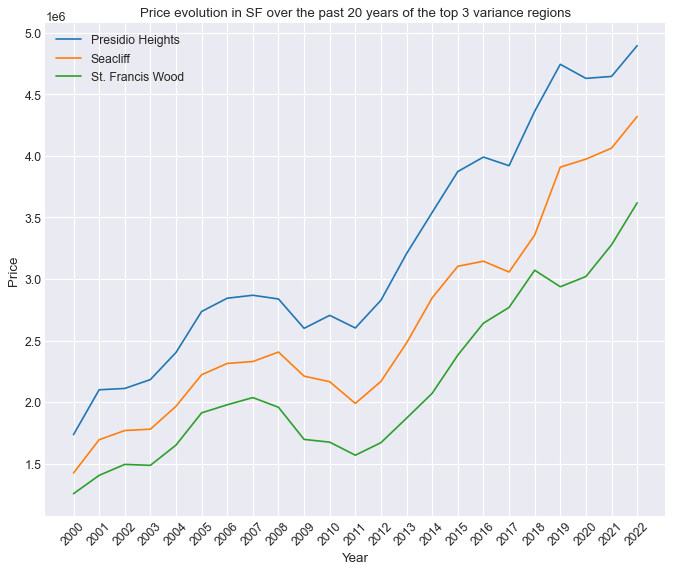

In [18]:
final_home_pricing_var = final_home_pricing.drop(['Lng','Lat','region'], axis=1).T

figure(figsize=(10, 8), dpi=80)

variance = final_home_pricing_var.var()
regions_var = variance.nlargest(n=3).to_dict().keys()

final_home_pricing_var = final_home_pricing_var.reset_index()

for col in regions_var :
    plt.plot(final_home_pricing_var['year'], final_home_pricing_var[col], label=col)
    
plt.title('Price evolution in SF over the past 20 years of the top 3 variance regions')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation = 45) 
plt.legend()
plt.show()

### San Francisco Crime Rate

In [19]:
# read crime csv dataset (did not use API)
crime_bef_2018 = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', usecols=['IncidntNum','Category','Descript','Date','X','Y'])
crime_after_2018 = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv', usecols=['Incident Number','Incident Category','Incident Description','Longitude','Latitude','Incident Year'])

In [20]:
# rename columns to match the data in before 2018
crime_after_2018.rename(columns = {'Incident Number':'IncidntNum','Incident Category':'Category','Incident Description':'Descript','Longitude':'X','Latitude':'Y','Incident Year':'year'}, inplace = True)

# drop the nan values from the data after 2018
crime_after_2018 = crime_after_2018.dropna()

In [21]:
# prepare the data after 2018 for merge
crime_bef_2018['Date']= pd.to_datetime(crime_bef_2018['Date'])
crime_bef_2018['year'] = crime_bef_2018['Date'].dt.year
crime_bef_2018 = crime_bef_2018.drop('Date', axis=1)

In [22]:
crime_sf = pd.concat([crime_bef_2018, crime_after_2018], ignore_index=True, sort=False)

In [23]:
crime_sf

,IncidntNum,Category,Descript,X,Y,year
0,41334220,ROBBERY,"ROBBERY, BODILY FORCE",-122.420084,37.708311,2004
1,51185358,VEHICLE THEFT,STOLEN AUTOMOBILE,-120.500000,90.000000,2005
2,40188309,VEHICLE THEFT,STOLEN AUTOMOBILE,-120.500000,90.000000,2004
3,110145431,ARSON,ARSON,-122.436220,37.724377,2011
4,101081080,ASSAULT,BATTERY,-122.410541,37.770913,2010
...,...,...,...,...,...,...
2779649,236013144,Larceny Theft,"Theft, From Locked Vehicle, >$950",-122.452097,37.762167,2022
2779650,230053245,Other,"Death Report, Cause Unknown",-122.416292,37.793892,2023
2779651,230052708,Motor Vehicle Theft,"Vehicle, Stolen, Auto",-122.483059,37.719793,2023
2779652,230050495,Malicious Mischief,"Malicious Mischief, Vandalism to Property",-122.427203,37.781117,2023


In [24]:
crime_sf.year.unique()

array([2004, 2005, 2011, 2010, 2013, 2017, 2016, 2006, 2009, 2012, 2003,
       2007, 2008, 2015, 2014, 2018, 2021, 2020, 2022, 2019, 2023],
      dtype=int64)

### Correlation between housing prices and crime

In the following scatter plot, we will compare the change in crime in relation to the change in housing prices from 2003 to 2022 in the regions of San Francicso. To do this, we will prepare a new data set to gather information from every year from the housing price dataset and compare against the number of crimes from the crime dataset

In [25]:
compare_crime_price = crime_sf.groupby(['year']).count()[:-1]

In [26]:
compare_crime_price.head()

,IncidntNum,Category,Descript,X,Y
year,,,,,
2003,142803,142803,142803,142803,142803
2004,142054,142054,142054,142054,142054
2005,137048,137048,137048,137048,137048
2006,131856,131856,131856,131856,131856
2007,131771,131771,131771,131771,131771


In [27]:
# drop irrelevant columns
compare_crime_price['price'] = final_home_pricing.drop(['Lng','Lat','region','2000','2001','2002'], axis=1).mean().values
compare_crime_price = compare_crime_price.drop(['Category','Descript','X','Y'], axis=1)

In [28]:
# rename "IncidntNum" to just "Number"
compare_crime_price.rename(columns = {'IncidntNum':'Number'}, inplace = True)

In [29]:
compare_crime_price

,Number,price
year,,
2003,142803,7.731558e+05
2004,142054,8.559378e+05
2005,137048,9.861348e+05
2006,131856,1.022826e+06
2007,131771,1.043747e+06
2008,135242,1.014031e+06
2009,134309,9.162063e+05
2010,127758,8.892231e+05
2011,126713,8.416086e+05


In [30]:
from scipy.stats import linregress

def scatter(data) :

    x_values = data['price'].values
    y_values = data['Number'].values

    # Perform a linear regression for temperature vs. latitude:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values:
    regress_values = x_values * slope + intercept

    # Create line equation string:
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create plot:
    plt.scatter(x_values,y_values, color='blue', s=[40], edgecolors='black')
    plt.plot(x_values,regress_values, 'darkred', linewidth=2)

    # Graph properties:
    plt.ylabel('Number of crimes', fontsize=16, color='black')
    plt.xlabel('Housing Price', fontsize=16, color='black')
    plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
    plt.grid(False)


    # Print r-squared value:
    print(f'The r value is: {round(rvalue**2,2)}')
    
    # Show plot:
    plt.show()

The r value is: 0.01


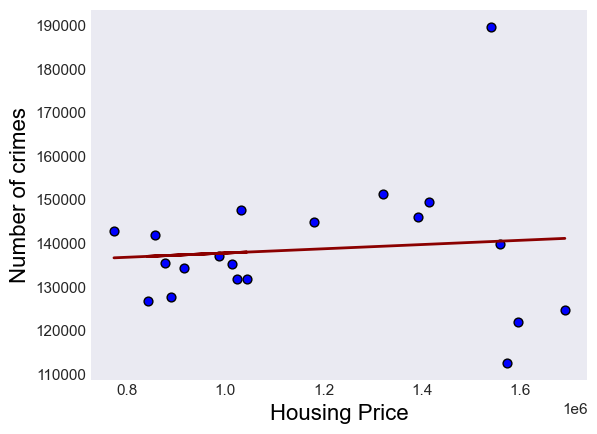

In [31]:
scatter(compare_crime_price)

### Two-tailted test with null/alternative hypothesis

A two-tailed test is a statistical test used to compare the means of two groups and determine if there is a significant difference between them. The null hypothesis states that there is no difference between the means of the two groups, while the alternative hypothesis states that there is a difference.

In [32]:
import pandas as pd
from scipy.stats import ttest_ind

# Perform the t-test
t, p = ttest_ind(compare_crime_price['price'], compare_crime_price['Number'])

# Print the results
print("t = ", t)
print("p = ", p)

t =  15.290505013951142
p =  8.040970188886129e-18


### Determine statistical significance given the data and accept/reject the null

It's important consider the sample size in a two-tailed test--a larger sample size increases the power of the test.

The t-statistic measures the difference between the means of the two groups in relation to the standard error of the difference. A large t-statistic indicates a large difference between the means of the two groups. In this case, the t-statistic of 15.29 is quite large, indicating a large difference between the means of the two groups.

The p-value is used to determine the statistical significance of the difference between the means. A small p-value indicates that the difference between the means is unlikely to have occurred by chance. In this case, the p-value of 8.04e-18 is extremely small, indicating that the difference between the means is statistically significant.